# Phân loại với K-Nearest Neighbors
#### <span style="color: gold;"> Thầy/cô chỉ cần chạy các cells trong phần này</span>

### Full data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)
import seaborn as sns
import numpy as np

SPLIT_RATIOS = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

import os
BASE_DIR = os.path.dirname(
    os.path.dirname(
        os.path.dirname(
            os.path.abspath('notebook/preprocessing.ipynb'))))

df_4 = pd.read_csv(os.path.join(BASE_DIR, 'data/processed_data_4_classes.csv'))
df_9 = pd.read_csv(os.path.join(BASE_DIR, 'data/processed_data_9_classes.csv'))

X_4 = df_4.drop(columns=['Classification'])
y_4 = df_4['Classification']
X_9 = df_9.drop(columns=['Classification'])
y_9 = df_9['Classification']

def distance(array, value):
  array = np.array(array)
  value = np.array(value)
  return np.linalg.norm(array - value, ord = 1, axis=1)

def find_k_nearest_index(array, value, k):
  dists = distance(array, value)
  return np.argsort(dists)[:k]

def knn(X_features, y_class, split_ratios):
    acc_list =  []
    for k in [1,3,5,7,9,11,13,15]:
        avg_acc = 0
        for ratio in split_ratios:
            X_train, X_test, y_train, y_test = train_test_split(
                X_features, y_class, test_size=ratio[1], random_state=42, stratify=y_class
            )
            y_pred = np.zeros((len(y_test), 12))

            for i in range(len(X_test)):
                indexis = find_k_nearest_index(X_train, X_test.iloc[i], k=k)
                # print(f'{i}: ', end='')
                for idx in indexis:
                    # print(f'{idx} ', end='')
                    y_pred[i, y_train[idx]] += 1

            y_pred_class = np.zeros(len(y_test))
            for i in range(len(y_pred)):
                y_pred_class[i] = np.argmax(y_pred[i])

            y_test.reshape(len(y_test))

            knn_raw_acc = accuracy_score(y_test.reshape(len(y_test)), y_pred_class)
            avg_acc += knn_raw_acc
            print(f'Accuracy \033[31m{k}-NN\033[0m bằng dữ liệu gốc với train/test = \033[31m{ratio[0]}/{ratio[1]}\033[0m: \033[31m{knn_raw_acc}\033[0m')
        print(f'Avg accuracy với k = \033[31m{k}\033[0m: \033[31m{avg_acc / 3}\033[0m', end='\n')
        acc_list.append(avg_acc / 3)
            
    return acc_list

y_4_encoded = pd.factorize(y_4)[0]
y_9_encoded = pd.factorize(y_9)[0]
knn_acc_4 = knn(X_4, y_4_encoded, SPLIT_RATIOS)
import time
start_time = time.time()
knn_acc_9 = knn(X_9, y_9_encoded, SPLIT_RATIOS)
end_time = time.time()

Accuracy 1-NN bằng dữ liệu gốc với train/test = 0.8/0.2: 0.9439252336448598
Accuracy 1-NN bằng dữ liệu gốc với train/test = 0.7/0.3: 0.9439252336448598
Accuracy 1-NN bằng dữ liệu gốc với train/test = 0.6/0.4: 0.955503512880562
Avg accuracy với k = 1: 0.9477846600567604
Accuracy 3-NN bằng dữ liệu gốc với train/test = 0.8/0.2: 0.9766355140186916
Accuracy 3-NN bằng dữ liệu gốc với train/test = 0.7/0.3: 0.956386292834891
Accuracy 3-NN bằng dữ liệu gốc với train/test = 0.6/0.4: 0.9531615925058547
Avg accuracy với k = 3: 0.9620611331198125
Accuracy 5-NN bằng dữ liệu gốc với train/test = 0.8/0.2: 0.9766355140186916
Accuracy 5-NN bằng dữ liệu gốc với train/test = 0.7/0.3: 0.9532710280373832
Accuracy 5-NN bằng dữ liệu gốc với train/test = 0.6/0.4: 0.9461358313817331
Avg accuracy với k = 5: 0.958680791145936
Accuracy 7-NN bằng dữ liệu gốc với train/test = 0.8/0.2: 0.9813084112149533
Accuracy 7-NN bằng dữ liệu gốc với train/test = 0.7/0.3: 0.9532710280373832
Accuracy 7-NN bằng dữ liệu gốc với tra

In [40]:
print(f"KNN on 9 classes took {round(end_time - start_time, 5)} seconds")

KNN on 9 classes took 0.79382 seconds


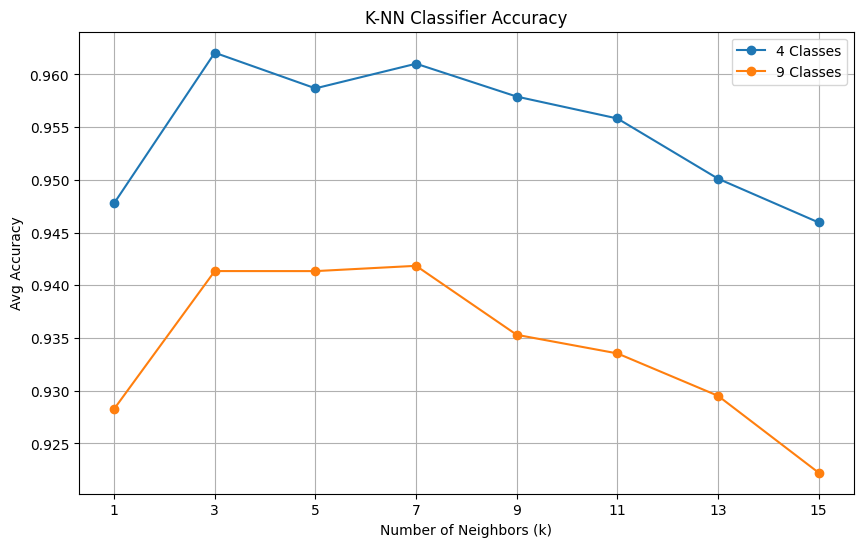

In [21]:
plt.figure(figsize=(10, 6))
plt.plot([1,3,5,7,9,11,13,15], knn_acc_4, marker='o', label='4 Classes')
plt.plot([1,3,5,7,9,11,13,15], knn_acc_9, marker='o', label='9 Classes')
plt.title('K-NN Classifier Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Avg Accuracy')
plt.xticks([1,3,5,7,9,11,13,15])
plt.legend()
plt.grid()
plt.show()

Đánh giá với k = 3 và k = 7

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.99      0.99      0.99       140
           2       0.80      0.57      0.67         7
           3       0.89      0.94      0.91        17

    accuracy                           0.98       214
   macro avg       0.92      0.88      0.89       214
weighted avg       0.98      0.98      0.98       214



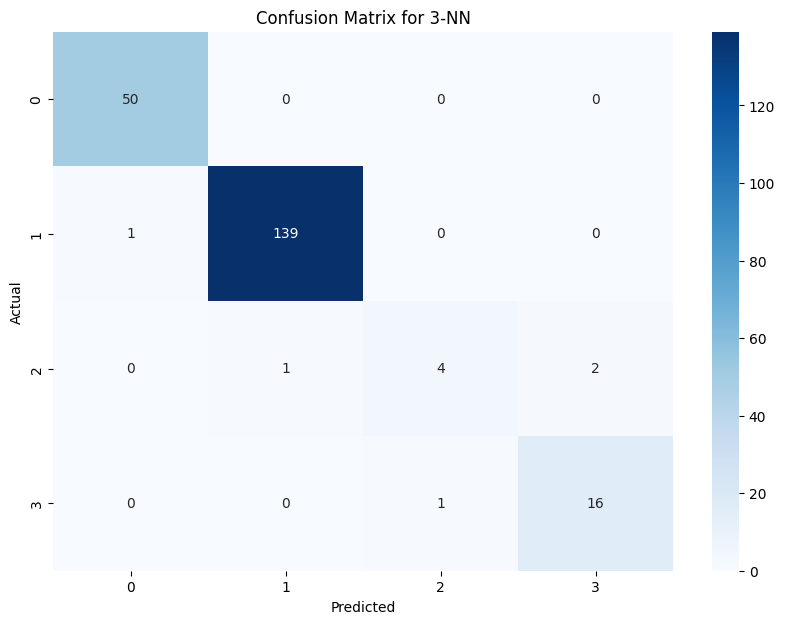

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.98      0.99      0.98       140
           2       0.57      0.57      0.57         7
           3       0.89      0.89      0.89        18
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.95       221
   macro avg       0.53      0.55      0.54       221
weighted avg       0.94      0.95      0.94       221



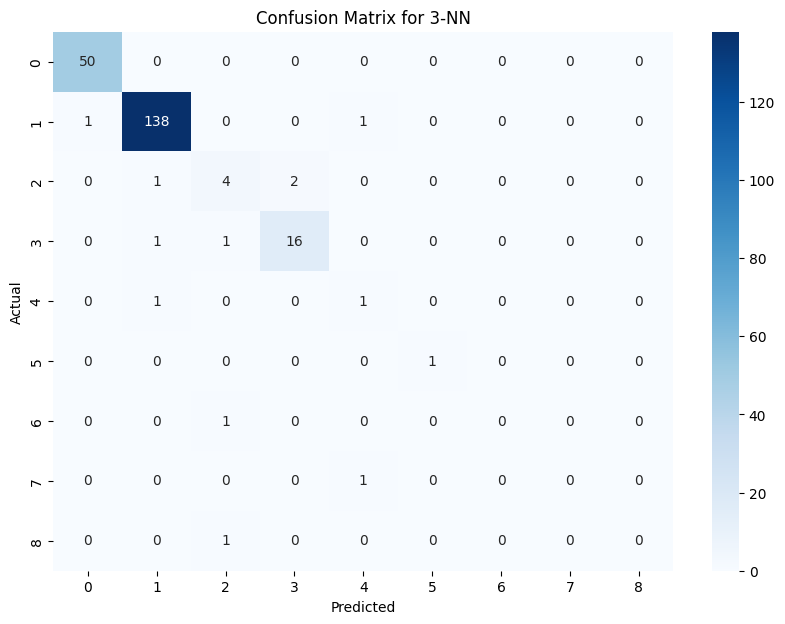

In [ ]:
# Classification Report and Confusion Matrix for best k and best train/test split
best_k = 3
def knn_evaluate(X_features, y_class, k, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_class, test_size=test_size, random_state=42, stratify=y_class
    )
    y_pred = np.zeros((len(y_test), 12))

    for i in range(len(X_test)):
        indexis = find_k_nearest_index(X_train, X_test.iloc[i], k=k)
        for idx in indexis:
            y_pred[i, int(y_train[idx])] += 1

    y_pred_class = np.argmax(y_pred, axis=1).astype(int)

    print("Classification Report:")
    print(classification_report(y_test, y_pred_class, zero_division=0))

    cm = confusion_matrix(y_test, y_pred_class)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {k}-NN')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

knn_evaluate(X_4, y_4_encoded, best_k)
knn_evaluate(X_9, y_9_encoded, best_k)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.99      1.00      1.00       140
           2       0.80      0.57      0.67         7
           3       0.89      0.94      0.91        17

    accuracy                           0.98       214
   macro avg       0.92      0.88      0.89       214
weighted avg       0.98      0.98      0.98       214



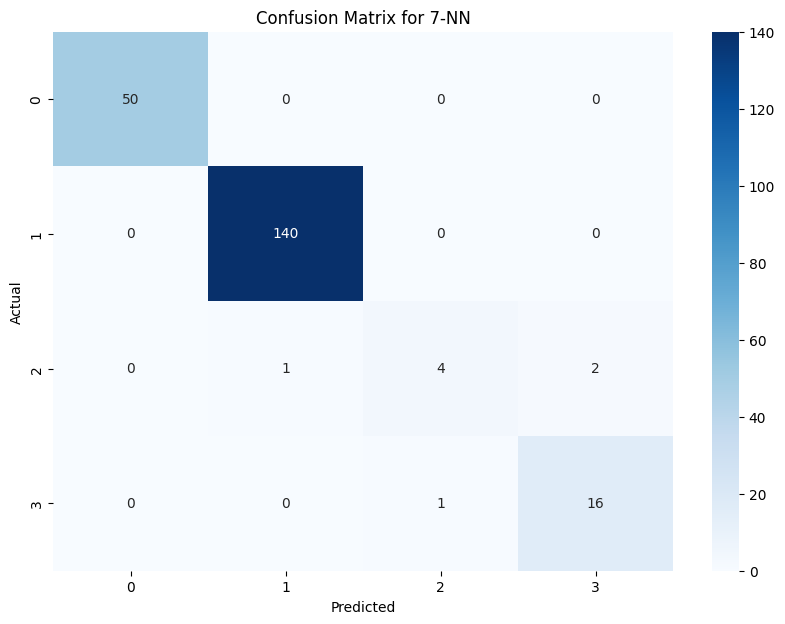

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.97      1.00      0.99       140
           2       0.67      0.57      0.62         7
           3       0.84      0.89      0.86        18
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.96       221
   macro avg       0.61      0.55      0.57       221
weighted avg       0.95      0.96      0.95       221



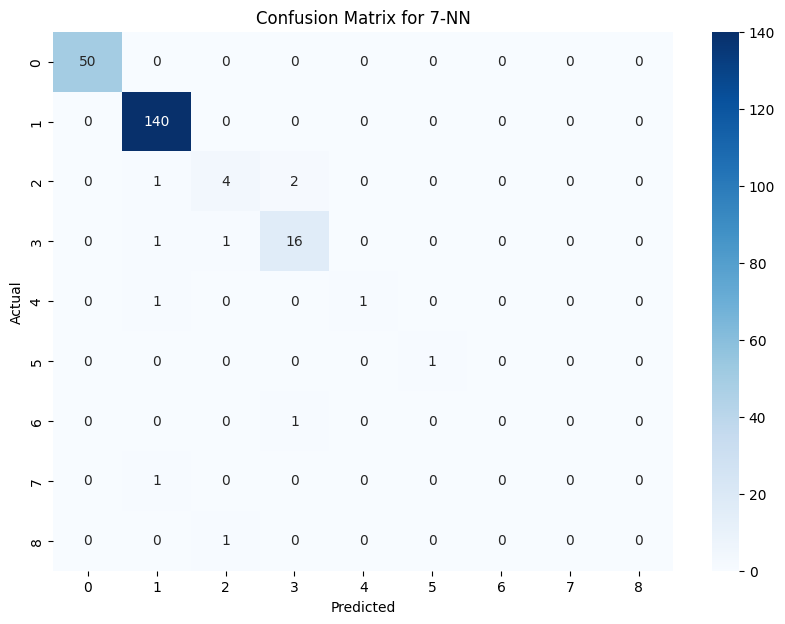

In [33]:
best_k = 7
knn_evaluate(X_4, y_4_encoded, best_k)
knn_evaluate(X_9, y_9_encoded, best_k)

### Random under sampling for 4 classes

In [37]:
# under sampling for 4 classes for 36 samples each
df_4_under = df_4.copy()
df_4_under = df_4_under.groupby('Classification', group_keys=False).sample(n=36, random_state=42).reset_index(drop=True)
X_4_under = df_4_under.drop(columns=['Classification'])
y_4_under = df_4_under['Classification']
y_4_under_encoded = pd.factorize(y_4_under)[0]

import time 
start_time = time.time()
acc_4_under = knn(X_4_under, y_4_under_encoded, SPLIT_RATIOS)
end_time = time.time()

Accuracy 1-NN bằng dữ liệu gốc với train/test = 0.8/0.2: 0.8620689655172413
Accuracy 1-NN bằng dữ liệu gốc với train/test = 0.7/0.3: 0.8636363636363636
Accuracy 1-NN bằng dữ liệu gốc với train/test = 0.6/0.4: 0.8103448275862069
Avg accuracy với k = 1: 0.8453500522466039
Accuracy 3-NN bằng dữ liệu gốc với train/test = 0.8/0.2: 0.896551724137931
Accuracy 3-NN bằng dữ liệu gốc với train/test = 0.7/0.3: 0.8181818181818182
Accuracy 3-NN bằng dữ liệu gốc với train/test = 0.6/0.4: 0.7586206896551724
Avg accuracy với k = 3: 0.8244514106583072
Accuracy 5-NN bằng dữ liệu gốc với train/test = 0.8/0.2: 0.8620689655172413
Accuracy 5-NN bằng dữ liệu gốc với train/test = 0.7/0.3: 0.8636363636363636
Accuracy 5-NN bằng dữ liệu gốc với train/test = 0.6/0.4: 0.7931034482758621
Avg accuracy với k = 5: 0.8396029258098223
Accuracy 7-NN bằng dữ liệu gốc với train/test = 0.8/0.2: 0.9655172413793104
Accuracy 7-NN bằng dữ liệu gốc với train/test = 0.7/0.3: 0.8409090909090909
Accuracy 7-NN bằng dữ liệu gốc với t

In [38]:
print(f"Under sampling KNN took {round(end_time - start_time, 5)} seconds")

Under sampling KNN took 0.12196 seconds


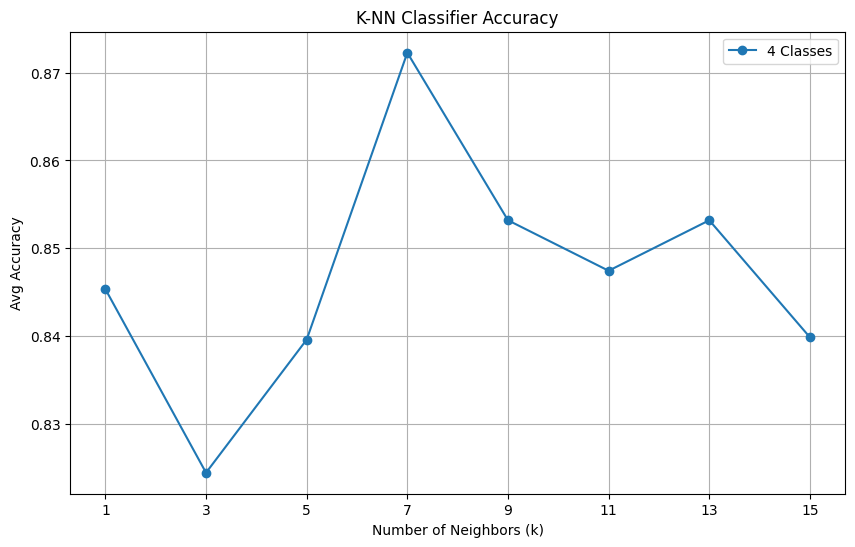

In [34]:
plt.figure(figsize=(10, 6))
plt.plot([1,3,5,7,9,11,13,15], acc_4_under, marker='o', label='4 Classes')
plt.title('K-NN Classifier Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Avg Accuracy')
plt.xticks([1,3,5,7,9,11,13,15])
plt.legend()
plt.grid()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      0.88      0.93         8
           3       0.88      1.00      0.93         7

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



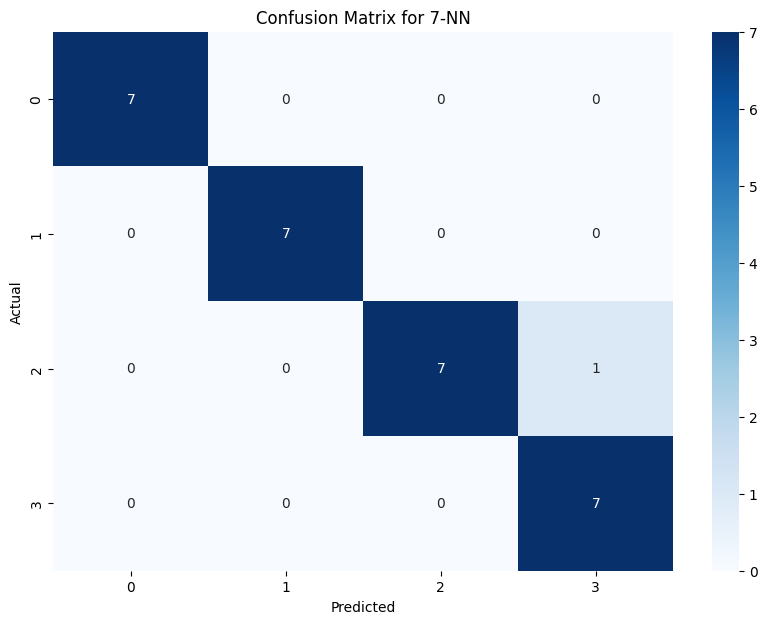

In [35]:
best_k_under = 7
knn_evaluate(X_4_under, y_4_under_encoded, best_k_under)